# Trabalho A2 - Álgebra Linear 


### Ana Júlia Amaro Pereira Rocha
### Maria Eduarda Mesquita Magalhães

### **Curso: Ciência de Dados e Inteligência Artificial / 2º período**

### **Tema**: Aplicação de mínimos quadrados objetivando obter regressões lineares em dados de um Data Frame

#### Em Álgebra Linear, aprendemos que nem sempre um sistema linear possui soluções, especialmente quando tem-se mais equações do que incógnitas. Desse modo, uma forma de "resolver" tal problema é usando o método dos mínimos quadrados, no qual encontramos uma reta que melhor minimiza o erro no conjunto de dados. Logo, o objetivo desse trabalho é justamente analisar duas colunas da base de dados, em cada gráfico plotado, buscando entender a relação entre tais colunas. Com isso, chegaremos a conclusões sobre o tema do Data Frame a partir do uso de álgebra linear em seus dados.

#### Inicialmente, gostaríamos de apresentar nossa base de dados. Escolhemos um Data Frame com dados de dispositivos inteligentes como os modernos relógios que contam os passos, a quantidade de calorias e outros recursos referentes às atividades diárias dos seus usuários. Então, já podemos perceber que por se tratarem de informações particulares dos corpos de pessoas diferentes, é um tanto quanto difícil ter valores lineares. Afinal, calorias, por exemplo, é o assunto de uma das colunas da nossa base e, como é de se perceber, prever quantas calorias um corpo humano gasta em cada atividade não é uma tarefa simples, envolve diversos fatores como o gênero, o peso, a idade, a intensidade e o tempo da atividade física, entre outros.

#### Enfim, nós pesquisamos e vimos que realmente esses dispositivos inteligentes levam em conta muitas características do corpo dos usuários para prever os dados que temos na nossa base, pois como já explicamos não são informações obtidas a partir de apenas uma varíavel. Portanto, gostaríamos apenas de deixar essa observação e explicar que alguns gráficos não possuem regressões lineares com a precisão esperada, embora sejam úteis para a análise, porque estão longe de serem lineares, dependem de diversos fatores e são complexas como todos os recursos a respeito do funcionamento de um corpo humano.

In [9]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### No código a seguir, nós normalizamos a base por dois motivos. O primeiro é que achamos que ter valores apenas entre 0 e 1 deixaria melhor a visualização e posterior interpretação dos dados no gráfico. Além disso, melhora o r2_score, o que nos permite conhecer melhor a precisão da regressão linear em cada gráfico.

In [10]:
# Reading data from csv and dropping null values
df = pd.read_csv("dailyactivity_v3.csv").dropna()

# Identification of the ID column so as not to modify this column later
coluna_id = "Id"

# Selection of numeric columns, except the ID column
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
colunas_numericas = colunas_numericas.drop(coluna_id)

# MinMaxScaler initialization
scaler = MinMaxScaler()

# Normalization of all numeric columns
for coluna in colunas_numericas:
    df[coluna] = scaler.fit_transform(df[[coluna]])

# Creating x and y vectors with values from the database's columns
# Each pair of vectors is an analysis and a graph that will be plotted

x1 = df["LightlyActiveMinutes"].values.reshape(-1,1)
y1 = df["LightActiveDistance"].values

x2 = df["FairlyActiveMinutes"].values.reshape(-1,1)
y2 = df["ModeratelyActiveDistance"].values

x3 = df["VeryActiveMinutes"].values.reshape(-1,1)
y3 = df["VeryActiveDistance"].values

x4 = df["TotalSteps"].values.reshape(-1,1)
y4= df["TotalDistance"].values

x5 = df["SedentaryMinutes"].values.reshape(-1,1)
y5= df["Calories"].values

x6 = df["LightlyActiveMinutes"].values.reshape(-1,1)
y6= df["Calories"].values

x7 = df["FairlyActiveMinutes"].values.reshape(-1,1)
y7= df["Calories"].values

x8 = df["VeryActiveMinutes"].values.reshape(-1,1)
y8= df["Calories"].values

x9 = df["LightActiveDistance"].values.reshape(-1,1)
y9= df["Calories"].values

x10 = df["ModeratelyActiveDistance"].values.reshape(-1,1)
y10= df["Calories"].values

x11 = df["VeryActiveDistance"].values.reshape(-1,1)
y11= df["Calories"].values

x12 = df["TotalMinutesActive"].values.reshape(-1,1)
y12= df["Calories"].values

x13 = df["TotalDistance"].values.reshape(-1,1)
y13= df["Calories"].values

x14 = df["TotalSteps"].values.reshape(-1,1)
y14= df["Calories"].values

#### Para os próximos blocos de código, deve-se levar em conta algo que aprendemos em Álgebra Linear, ou seja, que quando Ax=b for inconsistente, sua solução com mínimos quadrados minimizará ||Ax - b||² e isso é feito por meio das chamadas "equações normais" $ A^T A \hat{x} = A^T b $.

#### Tendo isso em mente, vamos explicar aos poucos o que estamos fazendo em cada bloco de código. No caso das linhas seguintes, estamos adicionando uma coluna de uns na matriz bidimensional **X** com valores **x** (valores da coluna especificada no vetor x). Essa adição é feita para representar o termo linear, considerando que temos $ Xc = y $ onde **c** é o vetor coluna com os coeficientes **b** e **a**, respectivamente, de $ b + ax = y $ (equação linear geral) e $y$ é o vetor definido anteriormente com dados da coluna especificada nele.

#### $ Xc = y =>    \begin{bmatrix}  1 & x_{1} \\ 1 & x_{2} \\  \vdots & \vdots \\  1 & x_{m} \\   \end{bmatrix}   \begin{bmatrix}  b \\ a \end{bmatrix} = \begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{m} \\ \end{bmatrix} $

#### Aqui $m$ é o número de linhas das colunas especificadas nos vetores **x** e **y**. E como já é possível perceber, esse vetor **c** de coeficientes da equação linear geral não vai ser exato, temos um número muito alto de equações para apenas duas incógnitas, não há solução para o sistema linear. Por isso, vamos usar o método dos mínimos quadrados da Álgebra Linear para encontrar um $ \hat{c} $ que melhor represente o conjunto de dados.

In [11]:
# Adding a column of 1s to represent the linear term
X_1 = np.column_stack([np.ones_like(x1), x1])
X_2 = np.column_stack([np.ones_like(x2), x2])
X_3 = np.column_stack([np.ones_like(x3), x3])
X_4 = np.column_stack([np.ones_like(x4), x4])
X_5 = np.column_stack([np.ones_like(x5), x5])
X_6 = np.column_stack([np.ones_like(x6), x6])
X_7 = np.column_stack([np.ones_like(x7), x7])
X_8 = np.column_stack([np.ones_like(x8), x8])
X_9 = np.column_stack([np.ones_like(x9), x9])
X_10 = np.column_stack([np.ones_like(x10), x10])
X_11 = np.column_stack([np.ones_like(x11), x11])
X_12 = np.column_stack([np.ones_like(x12), x12])
X_13 = np.column_stack([np.ones_like(x13), x13])
X_14 = np.column_stack([np.ones_like(x14), x14])

#### Agora, observe que no nosso caso $ A^T A \hat{x} = A^T b $ torna-se $ X^T X \hat{c} = X^T y $ sendo $ \hat{c} $ a solução procurada, ou seja, o vetor com os coeficientes de uma equação linear que melhor representa os dados em questão. 
#### Outro ponto notório que aprendemos em Álgebra Linear é que $ X^T X $ será inversível exatamente quando as colunas de $X$ forem linearmente independentes (LI) e, dessa maneira, o melhor $ \hat{c} $ estimado seria $ \hat{c} = (X^T X)^{-1} X^T y$.
#### Logo, como a matriz X possui apenas duas colunas, sendo uma com todas as entradas iguais a 1 e a outra com valores "aleatórios" de "Deep sleep percentage" da base de dados usada, temos que essas colunas são LI, já que uma coluna tem todos os valores iguais e a outra não, então não há um valor que multiplicando a coluna 1 encontremos a coluna 2.
#### Portanto, podemos usar a expressão $ \hat{c} = (X^T X)^{-1} X^T y $ para encontrar o vetor solução $ \hat{c} $, como fizemos no bloco seguinte.

In [12]:
# Fitting the linear regression using matrix solution
coefficients_1 = np.linalg.inv(X_1.T @ X_1) @ X_1.T @ y1
coefficients_2 = np.linalg.inv(X_2.T @ X_2) @ X_2.T @ y2
coefficients_3 = np.linalg.inv(X_3.T @ X_3) @ X_3.T @ y3
coefficients_4 = np.linalg.inv(X_4.T @ X_4) @ X_4.T @ y4
coefficients_5 = np.linalg.inv(X_5.T @ X_5) @ X_5.T @ y5
coefficients_6 = np.linalg.inv(X_6.T @ X_6) @ X_6.T @ y6
coefficients_7 = np.linalg.inv(X_7.T @ X_7) @ X_7.T @ y7
coefficients_8 = np.linalg.inv(X_8.T @ X_8) @ X_8.T @ y8
coefficients_9 = np.linalg.inv(X_9.T @ X_9) @ X_9.T @ y9
coefficients_10 = np.linalg.inv(X_10.T @ X_10) @ X_10.T @ y10
coefficients_11 = np.linalg.inv(X_11.T @ X_11) @ X_11.T @ y11
coefficients_12 = np.linalg.inv(X_12.T @ X_12) @ X_12.T @ y12
coefficients_13 = np.linalg.inv(X_13.T @ X_13) @ X_13.T @ y13
coefficients_14 = np.linalg.inv(X_14.T @ X_14) @ X_14.T @ y14

# Angular and linear coefficients
l1_coeff, a1_coeff = coefficients_1
l2_coeff, a2_coeff = coefficients_2
l3_coeff, a3_coeff = coefficients_3
l4_coeff, a4_coeff = coefficients_4
l5_coeff, a5_coeff = coefficients_5
l6_coeff, a6_coeff = coefficients_6
l7_coeff, a7_coeff = coefficients_7
l8_coeff, a8_coeff = coefficients_8
l9_coeff, a9_coeff = coefficients_9
l10_coeff, a10_coeff = coefficients_10
l11_coeff, a11_coeff = coefficients_11
l12_coeff, a12_coeff = coefficients_12
l13_coeff, a13_coeff = coefficients_13
l14_coeff, a14_coeff = coefficients_14

#### Nos códigos a seguir, estamos calculando o vetor y previsto pelos coeficientes encontrados e pela matriz com os valores de x. A seguir, usamos os vetores y previsto e original para calcular o nível de precisão da regressão linear e o desvio padrão médio a fim de melhor analisar nossas análises.

#### Deve-se levar em conta, como já dito inicialmente, que algumas análises apresentam um r2_score muito baixo porque as variáveis envolvidas não são lineares, são mais complexas e dependem de diversos fatores por ser algo referente ao funcionamente de corpos humanos e diferentes. Ainda assim, os dados nos trazem conclusões que serão vistas posteriormente.

In [13]:
# Model's prediction
y1_pred = X_1 @ coefficients_1
y2_pred = X_2 @ coefficients_2
y3_pred = X_3 @ coefficients_3
y4_pred = X_4 @ coefficients_4
y5_pred = X_5 @ coefficients_5
y6_pred = X_6 @ coefficients_6
y7_pred = X_7 @ coefficients_7
y8_pred = X_8 @ coefficients_8
y9_pred = X_9 @ coefficients_9
y10_pred = X_10 @ coefficients_10
y11_pred = X_11 @ coefficients_11
y12_pred = X_12 @ coefficients_12
y13_pred = X_13 @ coefficients_13
y14_pred = X_14 @ coefficients_14

# r² coefficient, used to check the accuracy of linear regression
# MSE is the mean standard error

r2_1 = r2_score(y1, y1_pred)
MSE_1 = np.mean((y1 - y1_pred)**2)
print(f"1-R² Score: {r2_1:.4f}            MSE: {MSE_1}")

r2_2 = r2_score(y2, y2_pred)
MSE_2 = np.mean((y2 - y2_pred)**2)
print(f"2-R² Score: {r2_2:.4f}            MSE: {MSE_2}")

r2_3 = r2_score(y3, y3_pred)
MSE_3 = np.mean((y3 - y3_pred)**2)
print(f"3-R² Score: {r2_3:.4f}            MSE: {MSE_3}")

r2_4 = r2_score(y4, y4_pred)
MSE_4 = np.mean((y4 - y4_pred)**2)
print(f"4-R² Score: {r2_4:.4f}            MSE: {MSE_4}")

r2_5 = r2_score(y5, y5_pred)
MSE_5 = np.mean((y5 - y5_pred)**2)
print(f"5-R² Score: {r2_5:.4f}            MSE: {MSE_5}")

r2_6 = r2_score(y6, y6_pred)
MSE_6 = np.mean((y6 - y6_pred)**2)
print(f"6-R² Score: {r2_6:.4f}            MSE: {MSE_6}")

r2_7 = r2_score(y7, y7_pred)
MSE_7 = np.mean((y7 - y7_pred)**2)
print(f"7-R² Score: {r2_7:.4f}            MSE: {MSE_7}")

r2_8 = r2_score(y8, y8_pred)
MSE_8 = np.mean((y8 - y8_pred)**2)
print(f"8-R² Score: {r2_8:.4f}            MSE: {MSE_8}")

r2_9 = r2_score(y9, y9_pred)
MSE_9 = np.mean((y9 - y9_pred)**2)
print(f"9-R² Score: {r2_9:.4f}            MSE: {MSE_9}")

r2_10 = r2_score(y10, y10_pred)
MSE_10 = np.mean((y10 - y10_pred)**2)
print(f"10-R² Score: {r2_10:.4f}            MSE: {MSE_10}")

r2_11 = r2_score(y11, y11_pred)
MSE_11 = np.mean((y11 - y11_pred)**2)
print(f"11-R² Score: {r2_11:.4f}            MSE: {MSE_11}")

r2_12 = r2_score(y12, y12_pred)
MSE_12 = np.mean((y12 - y12_pred)**2)
print(f"12-R² Score: {r2_12:.4f}            MSE: {MSE_12}")

r2_13 = r2_score(y13, y13_pred)
MSE_13 = np.mean((y13 - y13_pred)**2)
print(f"13-R² Score: {r2_13:.4f}            MSE: {MSE_13}")

r2_14 = r2_score(y14, y14_pred)
MSE_14 = np.mean((y14 - y14_pred)**2)
print(f"14-R² Score: {r2_14:.4f}            MSE: {MSE_14}")

1-R² Score: 0.7845            MSE: 0.007816771845374947
2-R² Score: 0.8967            MSE: 0.0019188768040032313
3-R² Score: 0.6834            MSE: 0.0046535237230062474
4-R² Score: 0.9710            MSE: 0.0005688575029048804
5-R² Score: 0.0114            MSE: 0.021212796017441832
6-R² Score: 0.0822            MSE: 0.01969432360896671
7-R² Score: 0.0886            MSE: 0.01955757417463438
8-R² Score: 0.3793            MSE: 0.013320124750820369
9-R² Score: 0.2180            MSE: 0.016780187212002046
10-R² Score: 0.0470            MSE: 0.020449852673780074
11-R² Score: 0.2420            MSE: 0.016264930002863585
12-R² Score: 0.0090            MSE: 0.02126488511796769
13-R² Score: 0.4160            MSE: 0.0125321946539127
14-R² Score: 0.3500            MSE: 0.013948939606265401


#### Daqui para a frente, buscamos explorar ao máximo a base de dados ao plotar os gráficos a seguir. Usamos variáveis e contas já definidas anteriormente.

#### Para os 3 primeiros plots, deve-se notar que a mecânica clássica nos diz que a velocidade instantânea é calculada pela derivada da posição em relação ao tempo, ou seja, a velocidade é a inclinação da curva plotada em um gráfico Distância X Tempo. Como aqui estamos considerando regressões lineares, a velocidade será dada pelo coeficiente angular da reta. Nesse sentido, os três primeiros gráficos permitem a análise do módulo da velocidade em cada tipo de exercício: o leve, o moderado e o intenso.

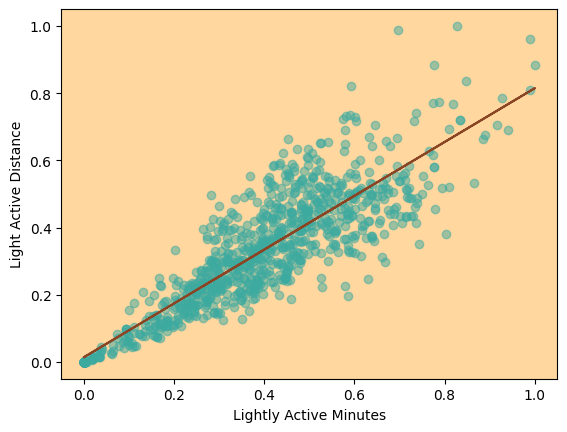

In [14]:
# Plotting 1
plt.scatter(x1, y1, alpha=0.5, color="#3CAA9F")
plt.plot(x1, l1_coeff + a1_coeff*x1, color="#8A4525") # line representing linear regression
plt.gca().set_facecolor("#FFD79F")
plt.xlabel("Lightly Active Minutes", color="black")
plt.ylabel("Light Active Distance", color="black"); # we use ";" to avoid printing the output

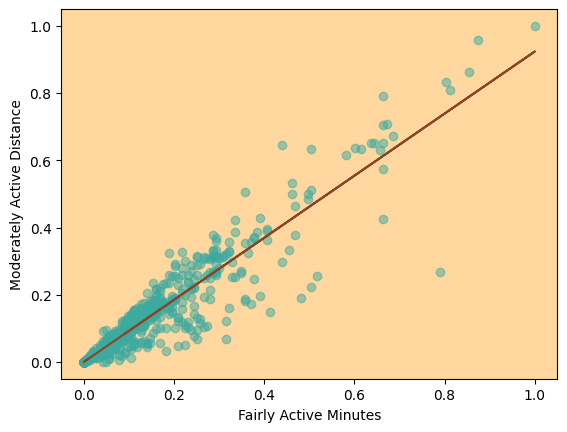

In [15]:
# Plotting 2

plt.scatter(x2, y2, alpha=0.5, color="#3CAA9F")
plt.plot(x2, l2_coeff + a2_coeff*x2, color="#8A4525")
plt.gca().set_facecolor("#FFD79F")
plt.xlabel("Fairly Active Minutes", color="black")
plt.ylabel("Moderately Active Distance", color="black"); # we use ";" to avoid printing the output

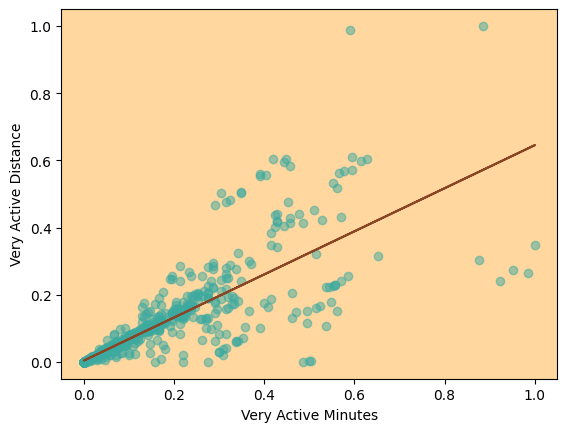

In [16]:
# Plotting 3

plt.scatter(x3, y3, alpha=0.5, color="#3CAA9F")
plt.plot(x3, l3_coeff + a3_coeff*x3, color="#8A4525")
plt.gca().set_facecolor("#FFD79F")
plt.xlabel("Very Active Minutes", color="black")
plt.ylabel("Very Active Distance", color="black"); # we use ";" to avoid printing the output

#### Note que a distância percorrida por um indivíduo aumenta com a quantidade de passos dados. Plotando os dados em um gráfico de dispersão chegamos a conclusão de que esse aumento tende ao comportamento linear. O que faz sentido se considerarmos que D = nd, sendo D a distância total, n o número de passos e d o tamanho de um passo.

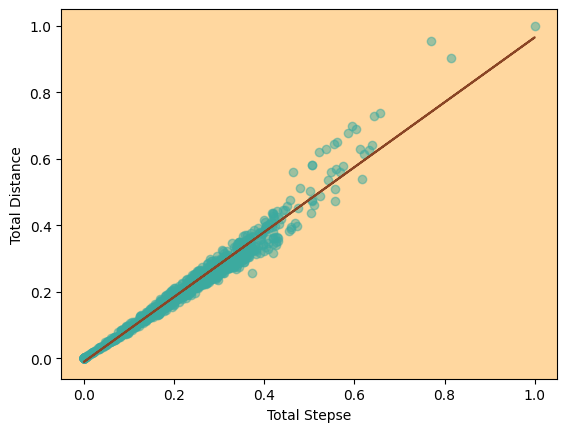

In [17]:
# Plotting 4

plt.scatter(x4, y4, alpha=0.5, color="#3CAA9F")
plt.plot(x4, l4_coeff + a4_coeff*x4, color="#8A4525")
plt.gca().set_facecolor("#FFD79F")
plt.xlabel("Total Stepse", color="black")
plt.ylabel("Total Distance", color="black"); # we use ";" to avoid printing the output

#### No gráfico 5, usamos os dados da coluna de calorias, provavelmente a coluna com dados menos lineares da nossa base. Afinal, como ressaltamos várias vezes, é algo previsto a partir de muitos fatores, sendo tão complexo como qualquer outro elemento relacionado ao funcionamento do organismo humano. Então, esse é o motivo de os dados do gráfico estarem tão dispersos e esta regressão linear não ser tão precisa.

#### Enfim, o próximo gráfico reflete a relação entre a quantidade de calorias queimadas e a quantidade de minutos gastos em um tempo dedicado ao sedentarismo. Quanto maior o tempo com ausência de atividades físicas, menor a quantidade de calorias gastas o que gera uma reta de coeficiente angular negativo. Observe:

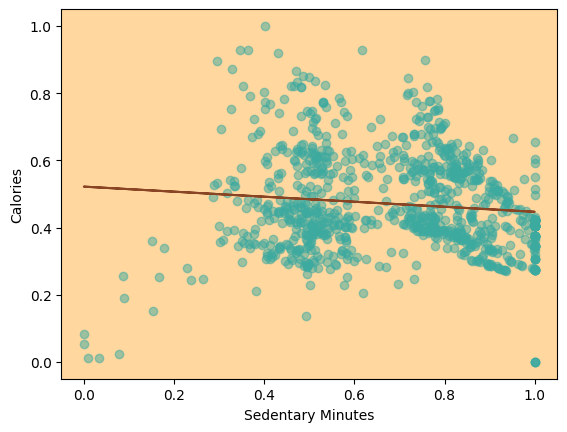

In [18]:
# Plotting 5

plt.scatter(x5, y5, alpha=0.5, color="#3CAA9F")
plt.plot(x5, l5_coeff + a5_coeff*x5, color="#8A4525")
plt.gca().set_facecolor("#FFD79F")
plt.xlabel("Sedentary Minutes", color="black")
plt.ylabel("Calories", color="black"); # we use ";" to avoid printing the output

#### A partir daqui, os gráficos foram condensados em uma só imagem para facilitar a análise comparativa entre os mesmos. 

#### Agora, analisaremos como a quantidade de calorias gasta varia com a quantidade de minutos despendida em cada tipo de exercício. Note que calorias são gastas mesmo sem a prática de exercício. Isso ocorre devido ao fato de que o corpo humano já gasta muitas calorias apenas para se manter em funcionamento. Atividades físicas aumentam o gasto calórico, mas este já é diferente de zero desde o início.

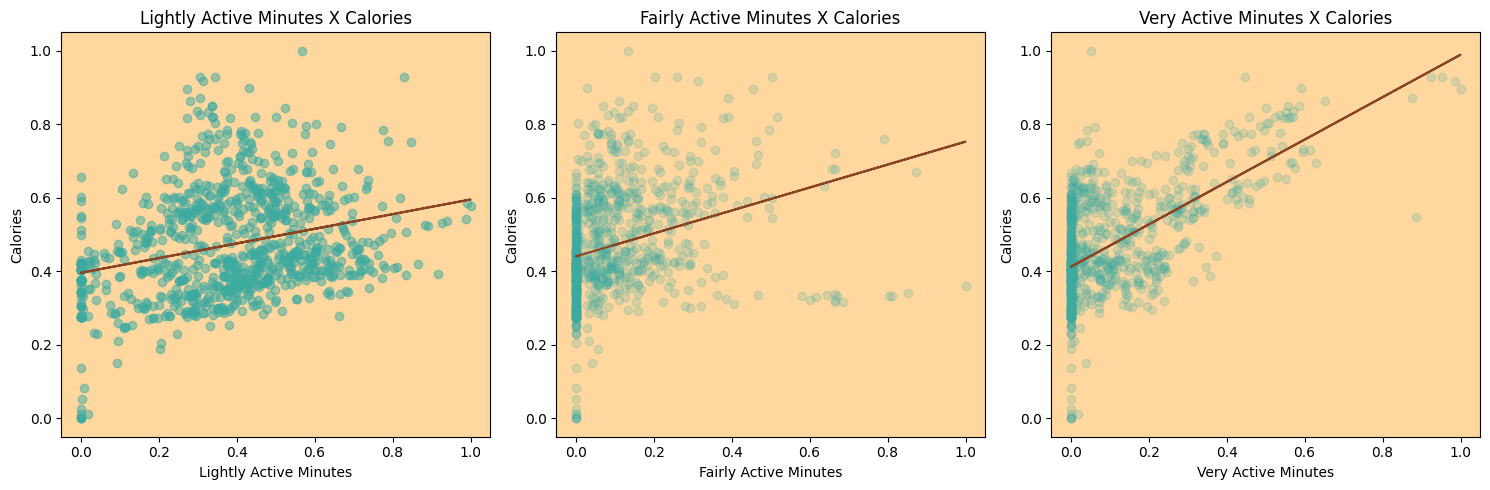

In [19]:
# Plotting 6,7,8

# creates a figure and a grid of subgraphs 1x3
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Graph 1
axs[0].scatter(x6, y6, alpha=0.5, color="#3CAA9F")
axs[0].plot(x6, l6_coeff + a6_coeff*x6, color="#8A4525")
axs[0].set_xlabel("Lightly Active Minutes", color="black")
axs[0].set_ylabel("Calories", color="black")
axs[0].set_title("Lightly Active Minutes X Calories")
axs[0].set_facecolor('#FFD79F')

# Graph 2
axs[1].scatter(x7, y7, alpha=0.2, color="#3CAA9F")
axs[1].plot(x7, l7_coeff + a7_coeff*x7, color="#8A4525")
axs[1].set_xlabel("Fairly Active Minutes", color="black")
axs[1].set_ylabel("Calories", color="black")
axs[1].set_title("Fairly Active Minutes X Calories")
axs[1].set_facecolor('#FFD79F')

# Graph 3
axs[2].scatter(x8, y8, alpha=0.2, color="#3CAA9F")
axs[2].plot(x8, l8_coeff + a8_coeff*x8, color="#8A4525")
axs[2].set_xlabel("Very Active Minutes", color="black")
axs[2].set_ylabel("Calories", color="black")
axs[2].set_title("Very Active Minutes X Calories")
axs[2].set_facecolor('#FFD79F')

# Adjusts the layout to avoid overlapping
plt.tight_layout()

# Displays the figure
plt.show()

#### Explicando o código: Este código utiliza a biblioteca Matplotlib para criar uma figura contendo três subgráficos dispostos em uma linha horizontal (1x3). Cada subgráfico representa a relação entre uma variável independente relacionada aos minutos de atividade física em diferentes intensidades (Lightly Active Minutes, Fairly Active Minutes, Very Active Minutes) e a variável dependente Calories.

#### No primeiro gráfico, Lightly Active Minutes é plotado contra Calories, utilizando um gráfico de dispersão com pontos semi-transparentes. Além disso, é ajustada uma linha de regressão linear aos dados, que é representada pela equação l6_coeff + a6_coeff*x6. As cores utilizadas para os pontos e a linha são especificadas em códigos hexadecimais, e o fundo do gráfico é colorido. Rótulos específicos são adicionados para os eixos e o título do gráfico.

#### Os gráficos 2 e 3 seguem a mesma lógica, representando Fairly Active Minutes e Very Active Minutes em relação às Calories, respectivamente. O ajuste do layout é feito para evitar sobreposição, e a figura resultante é exibida. O código fornece uma visualização eficaz das relações entre diferentes métricas de atividade física e calorias queimadas.

#### Nesse contexto, analisaremos agora como a quantidade de calorias gasta varia com a distância percorrida em cada tipo de exercício.

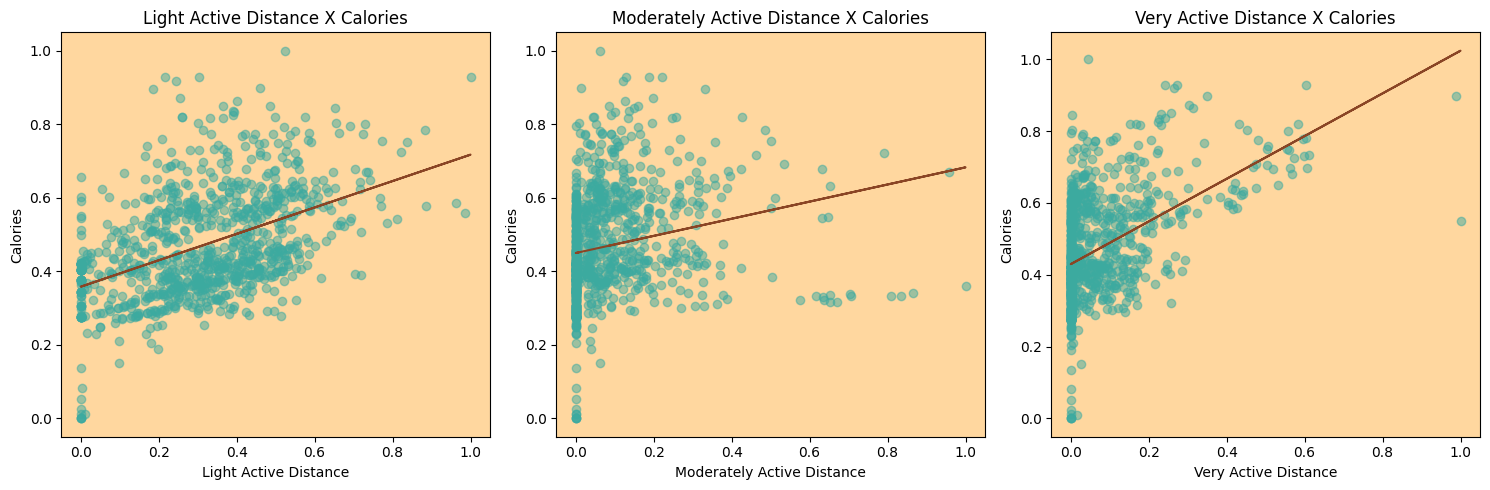

In [20]:
# Plotting 9, 10, 11
# Criar uma figura e um grid de subgráficos 1x3
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1
axs[0].scatter(x9, y9, alpha=0.5, color="#3CAA9F")
axs[0].plot(x9, l9_coeff + a9_coeff*x9, color="#8A4525")
axs[0].set_xlabel("Light Active Distance", color="black")
axs[0].set_ylabel("Calories", color="black")
axs[0].set_title("Light Active Distance X Calories")
axs[0].set_facecolor('#FFD79F')

# Gráfico 2
axs[1].scatter(x10, y10, alpha=0.5, color="#3CAA9F")
axs[1].plot(x10, l10_coeff + a10_coeff*x10, color="#8A4525")
axs[1].set_xlabel("Moderately Active Distance", color="black")
axs[1].set_ylabel("Calories", color="black")
axs[1].set_title("Moderately Active Distance X Calories")
axs[1].set_facecolor('#FFD79F')

# Gráfico 3
axs[2].scatter(x11, y11, alpha=0.5, color="#3CAA9F")
axs[2].plot(x11, l11_coeff + a11_coeff*x11, color="#8A4525")
axs[2].set_xlabel("Very Active Distance", color="black")
axs[2].set_ylabel("Calories", color="black")
axs[2].set_title("Very Active Distance X Calories")
axs[2].set_facecolor('#FFD79F')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir a figura
plt.show()

#### 

#### Para finalizar, analisaremos como a quantidade de calorias gasta varia com o total do tempo usado para atividades não sedentárias, a distância total percorrida e o total de passos dados. 

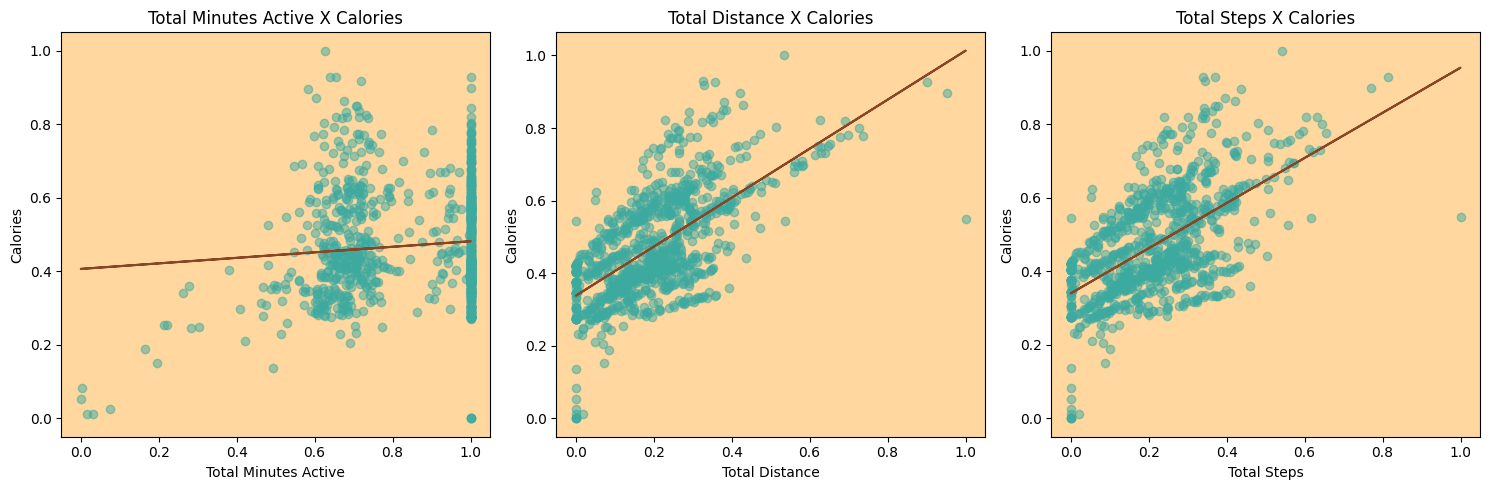

In [21]:
# Plotting 12, 13, 14

# Criar uma figura e um grid de subgráficos 1x3
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1
axs[0].scatter(x12, y12, alpha=0.5, color="#3CAA9F")
axs[0].plot(x12, l12_coeff + a12_coeff*x12, color="#8A4525")
axs[0].set_xlabel("Total Minutes Active", color="black")
axs[0].set_ylabel("Calories", color="black")
axs[0].set_title("Total Minutes Active X Calories")
axs[0].set_facecolor('#FFD79F')

# Gráfico 2
axs[1].scatter(x13, y13, alpha=0.5, color="#3CAA9F")
axs[1].plot(x13, l13_coeff + a13_coeff*x13, color="#8A4525")
axs[1].set_xlabel("Total Distance", color="black")
axs[1].set_ylabel("Calories", color="black")
axs[1].set_title("Total Distance X Calories")
axs[1].set_facecolor('#FFD79F')

# Gráfico 3
axs[2].scatter(x14, y14, alpha=0.5, color="#3CAA9F")
axs[2].plot(x14, l14_coeff + a14_coeff*x14, color="#8A4525")
axs[2].set_xlabel("Total Steps", color="black")
axs[2].set_ylabel("Calories", color="black")
axs[2].set_title("Total Steps X Calories")
axs[2].set_facecolor('#FFD79F')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir a figura
plt.show()

### **Conclusões:**

